#Imports

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
!pip install --upgrade xlrd
!pip install dataframe_image
%cd '/content'

--2022-08-07 15:51:49--  http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5539328 (5.3M) [application/x-httpd-php]
Saving to: ‘default of credit card clients.xls’

default of credit c 100%[===================>]   5.28M  4.92MB/s    in 1.1s    

2022-08-07 15:51:51 (4.92 MB/s) - ‘default of credit card clients.xls’ saved [5539328/5539328]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 1.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publi

In [ ]:
import string
import numpy as np
import pandas as pd
from collections import defaultdict
import dataframe_image as dfi

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import graphviz
from six import StringIO
import pydotplus

from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import chi2_contingency

from sklearn.preprocessing import OneHotEncoder
from imblearn import FunctionSampler
from imblearn.pipeline import Pipeline
from sklearn.pipeline import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from imblearn.over_sampling import SMOTE, KMeansSMOTE, SMOTENC
from imblearn.under_sampling import ClusterCentroids

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve, train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold

#Data Exploration


##Dataset Description

In [ ]:
palette = sns.color_palette(['tab:blue', 'tab:orange'])
alpha = 1

In [ ]:
df = pd.read_excel("default of credit card clients.xls", header=1, index_col='ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
dfi.export(df.head(), "df_head.png", table_conversion='matplotlib', max_rows=5)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique().size}")

LIMIT_BAL: 81
SEX: 2
EDUCATION: 7
MARRIAGE: 4
AGE: 56
PAY_0: 11
PAY_2: 11
PAY_3: 11
PAY_4: 11
PAY_5: 10
PAY_6: 10
BILL_AMT1: 22723
BILL_AMT2: 22346
BILL_AMT3: 22026
BILL_AMT4: 21548
BILL_AMT5: 21010
BILL_AMT6: 20604
PAY_AMT1: 7943
PAY_AMT2: 7899
PAY_AMT3: 7518
PAY_AMT4: 6937
PAY_AMT5: 6897
PAY_AMT6: 6939
default payment next month: 2


In [ ]:
for col in df.columns:
    print(f"Colonna {col}:\n{df[col].value_counts().sort_index()}")

Colonna LIMIT_BAL:
10000       493
16000         2
20000      1976
30000      1610
40000       230
           ... 
750000        4
760000        1
780000        2
800000        2
1000000       1
Name: LIMIT_BAL, Length: 81, dtype: int64
Colonna SEX:
1    11888
2    18112
Name: SEX, dtype: int64
Colonna EDUCATION:
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64
Colonna MARRIAGE:
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64
Colonna AGE:
21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
6

In [ ]:
df[((df["MARRIAGE"]==0) | (df["EDUCATION"]==0) | (df["EDUCATION"]==5) | (df["EDUCATION"]==6))].shape[0]

399

##Data Cleaning

In [ ]:
df_cleaned = df.rename(columns={'PAY_0': 'PAY_1'}, inplace=False)
df_cleaned.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
df_cleaned.loc[(df_cleaned['MARRIAGE']==0), 'MARRIAGE'] = 3
df_cleaned.loc[(df_cleaned['EDUCATION'] == 5) | (df_cleaned['EDUCATION'] == 6) | (df_cleaned['EDUCATION'] == 0), 'EDUCATION'] = 4

In [ ]:
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
cat_labels = {'SEX': ['Male', 'Female'], 'EDUCATION': ['Graduate\nschool', 'University', 'High school', 'Others'], 'MARRIAGE': ['Married', 'Single', 'Others']}

pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_cols_labels = {f'PAY_{i}': [-1]+list(range(1, 10)) for i in range(1, 7)}

pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
other_num_cols = ['LIMIT_BAL', 'AGE']

num_cols = pay_amt_cols + bill_amt_cols + other_num_cols
cat_cols = categorical_cols + pay_cols

In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique().size}")

LIMIT_BAL: 81
SEX: 2
EDUCATION: 7
MARRIAGE: 4
AGE: 56
PAY_0: 11
PAY_2: 11
PAY_3: 11
PAY_4: 11
PAY_5: 10
PAY_6: 10
BILL_AMT1: 22723
BILL_AMT2: 22346
BILL_AMT3: 22026
BILL_AMT4: 21548
BILL_AMT5: 21010
BILL_AMT6: 20604
PAY_AMT1: 7943
PAY_AMT2: 7899
PAY_AMT3: 7518
PAY_AMT4: 6937
PAY_AMT5: 6897
PAY_AMT6: 6939
default payment next month: 2


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

LIMIT_BAL: [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX: [2 1]
EDUCATION: [2 1 3 5 4 6 0]
MARRIAGE: [1 2 3 0]
AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0: [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2: [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3: [-1  

There is something strange in the values of the PAY_i columns

In [ ]:
df_cleaned[pay_cols].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
for p in pay_cols:
    df_cleaned.loc[df_cleaned[p] < 0, p] = -1
    df_cleaned.loc[df_cleaned[p] >= 0, p] += 1
    df_cleaned[p] = df_cleaned[p].astype('int64')

In [ ]:
df_cleaned[pay_cols].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.793767,0.664567,0.635867,0.589767,0.549167,0.517567
std,1.337645,1.394148,1.386123,1.347591,1.306001,1.322302
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
for col in pay_cols:
    print(df_cleaned[col].unique())

[ 3 -1  1  2  4  5  9  8  6  7]
[ 3  1 -1  4  6  8  5  2  7  9]
[-1  1  3  4  5  7  8  2  6  9]
[-1  1  3  4  5  6  8  7  2  9]
[-1  1  3  4  6  5  8  9  7]
[-1  3  1  4  7  5  8  9  6]


In [ ]:
for col in df_cleaned.columns:
    print(f"{col}: {df_cleaned[col].unique().size}")

LIMIT_BAL: 81
SEX: 2
EDUCATION: 4
MARRIAGE: 3
AGE: 56
PAY_1: 10
PAY_2: 10
PAY_3: 10
PAY_4: 10
PAY_5: 9
PAY_6: 9
BILL_AMT1: 22723
BILL_AMT2: 22346
BILL_AMT3: 22026
BILL_AMT4: 21548
BILL_AMT5: 21010
BILL_AMT6: 20604
PAY_AMT1: 7943
PAY_AMT2: 7899
PAY_AMT3: 7518
PAY_AMT4: 6937
PAY_AMT5: 6897
PAY_AMT6: 6939
DEFAULT: 2


In [ ]:
for col in df_cleaned.columns:
    print(f"{col}: {df_cleaned[col].unique()}")

LIMIT_BAL: [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX: [2 1]
EDUCATION: [2 1 3 4]
MARRIAGE: [1 2 3]
AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_1: [ 3 -1  1  2  4  5  9  8  6  7]
PAY_2: [ 3  1 -1  4  6  8  5  2  7  9]
PAY_3: [-1  1  3  4  5  7 

In [ ]:
for col in df_cleaned.columns:
    print(f"{col} has {df_cleaned[col].nunique()} unique values:\n{df_cleaned[col].value_counts()}")

LIMIT_BAL has 81 unique values:
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64
SEX has 2 unique values:
2    18112
1    11888
Name: SEX, dtype: int64
EDUCATION has 4 unique values:
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
MARRIAGE has 3 unique values:
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64
AGE has 56 unique values:
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62   

In [ ]:
df_cleaned.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

##Data Distribution

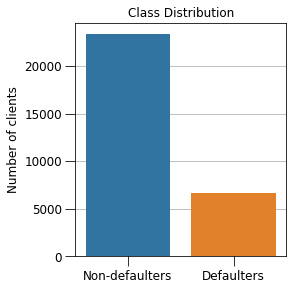

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x='DEFAULT', data=df_cleaned, alpha=alpha, palette=palette, zorder=2)
plt.title('Class Distribution', fontsize=12)
sns.set_color_codes('pastel')
plt.xticks([0,1],['Non-defaulters', 'Defaulters'])
plt.xlabel('')
plt.ylabel('Number of clients', fontsize=12)
plt.tight_layout()
plt.grid(zorder=0, axis='y')
plt.tick_params(axis='both', labelsize=12, size=10)
plt.show()

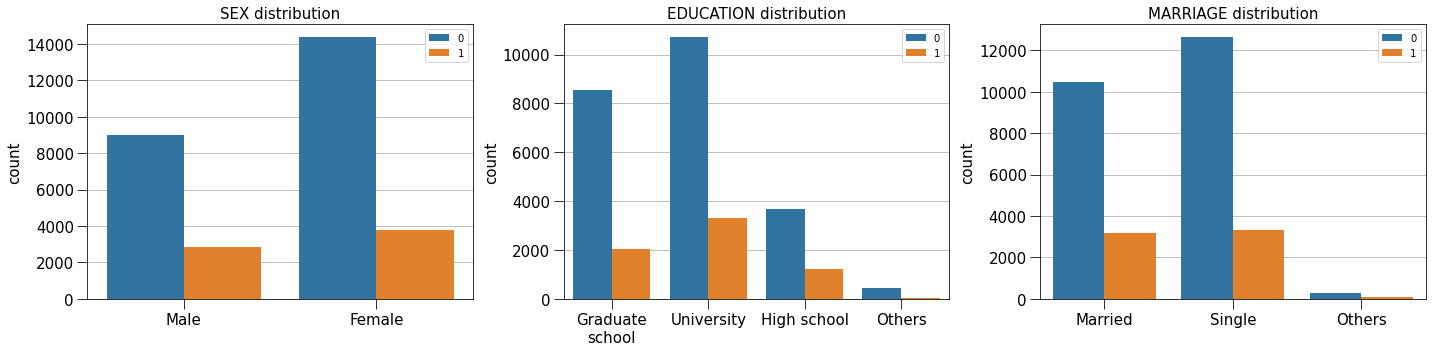

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

for i, col in enumerate(categorical_cols):
    axs[i].grid(zorder=0, axis='y')
    axs[i].set_title(f'{col} distribution', fontsize=15)
    sns.countplot(x=col, hue='DEFAULT', data=df_cleaned, ax=axs[i], alpha=alpha, palette=palette, zorder=2)
    axs[i].set_xticklabels(cat_labels[col], fontsize=15)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('count', fontsize=15)
    axs[i].tick_params(axis='both', labelsize=15, size=10)
    axs[i].legend()

fig.tight_layout()
plt.show()

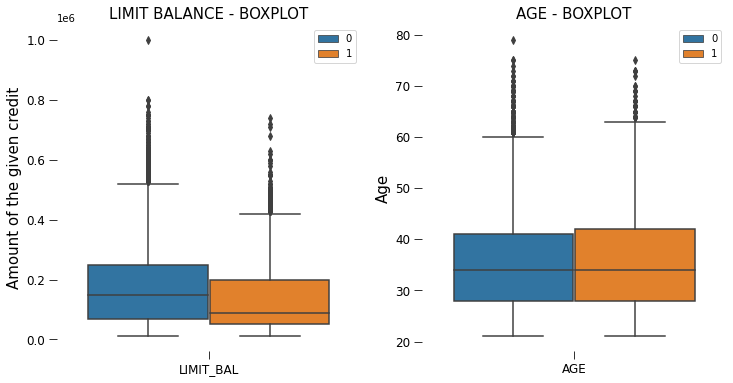

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

df_limit_bal = pd.melt(df_cleaned[['DEFAULT', 'LIMIT_BAL']], 
                    id_vars="DEFAULT",
                    var_name="Limit balance",
                    value_name='Amount of the given credit')

sns.boxplot(y="Amount of the given credit", x="Limit balance", hue="DEFAULT", data=df_limit_bal, ax=axs[0])
#plt.xlim([-1.5,5.5])
#plt.ylim([9900, 10200])
#plt.yticks(np.arange(-1,9))
axs[0].set_title('LIMIT BALANCE - BOXPLOT', fontsize=15)
axs[0].legend(loc='upper right')
axs[0].tick_params(axis='both', labelsize=12, size=8)
axs[0].set_xlabel('')
axs[0].set_ylabel('Amount of the given credit', fontsize=15)

df_limit_bal = pd.melt(df_cleaned[['DEFAULT', 'AGE']], 
                    id_vars="DEFAULT",
                    var_name="AGE",
                    value_name='Age')

sns.boxplot(y="Age", x="AGE", hue="DEFAULT", data=df_limit_bal, ax=axs[1])
#plt.xlim([-1.5,5.5])
#plt.ylim([9900, 10200])
#plt.yticks(np.arange(-1,9))
axs[1].set_title('AGE - BOXPLOT', fontsize=15)
axs[1].legend(loc='upper right')
axs[1].tick_params(axis='both', labelsize=12, size=8)
axs[1].set_xlabel('')
axs[1].set_ylabel('Age', fontsize=15)

sns.despine(left=True, bottom=True, right=True)

plt.show()

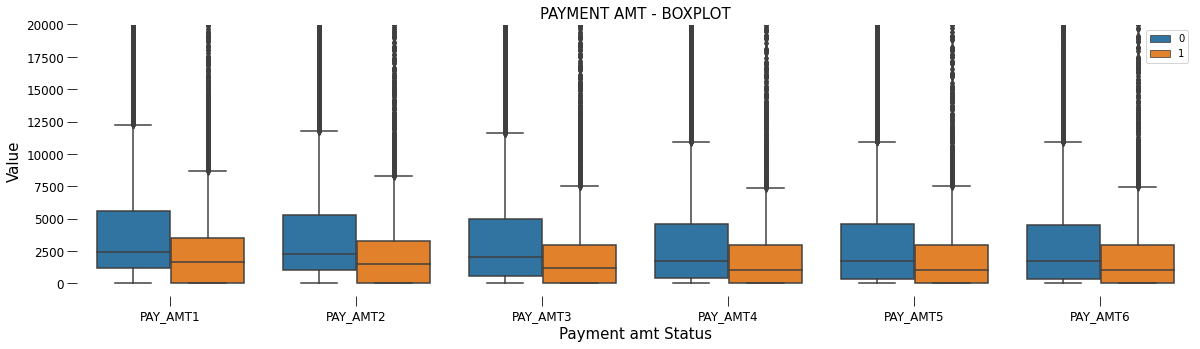

In [ ]:
df_pay_amt = pd.melt(df_cleaned[['DEFAULT']+pay_amt_cols], 
                    id_vars="DEFAULT",
                    var_name="Payment amt Status",
                    value_name='Value')

plt.figure(figsize=(20,5))
sns.boxplot(y="Value", x="Payment amt Status", hue="DEFAULT", data=df_pay_amt)
#plt.xlim([-1.5,5.5])
plt.ylim([-1000, 20000])
#plt.yticks(np.arange(-1,9))
plt.title('PAYMENT AMT - BOXPLOT', fontsize=15)
plt.legend(loc='upper right')
plt.tick_params(axis='both', labelsize=12, size=10)
plt.ylabel('Value', fontsize=15)
plt.xlabel('Payment amt Status', fontsize=15)
plt.box(False)

[]

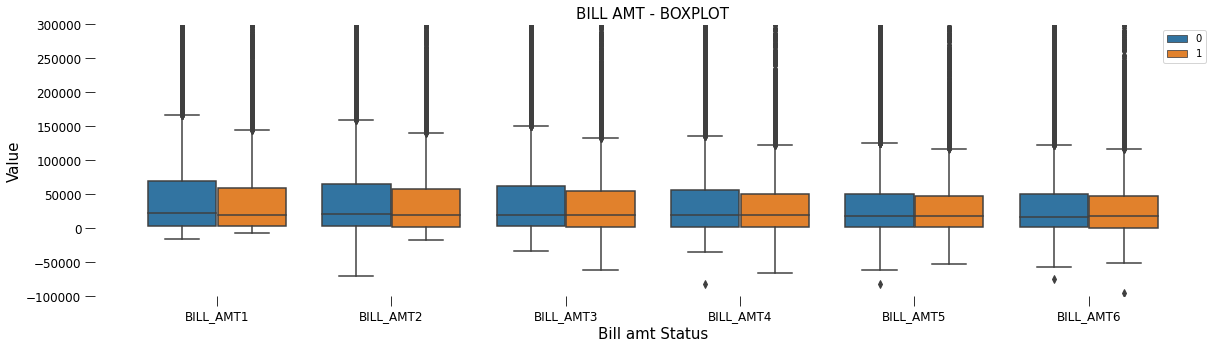

In [ ]:
df_bill_amt = pd.melt(df_cleaned[['DEFAULT']+bill_amt_cols], 
                    id_vars="DEFAULT",
                    var_name="Bill amt Status",
                    value_name='Value')

plt.figure(figsize=(20,5))
sns.boxplot(y="Value", x="Bill amt Status", hue="DEFAULT", data=df_bill_amt)
#plt.xlim([-1.5,5.5])
plt.ylim([-100000, 300000])
#plt.yticks(np.arange(-1,9))
plt.title('BILL AMT - BOXPLOT', fontsize=15)
plt.legend(loc='upper right')
plt.tick_params(axis='both', labelsize=12, size=10)
plt.ylabel('Value', fontsize=15)
plt.xlabel('Bill amt Status', fontsize=15)
plt.box(False)
plt.plot()

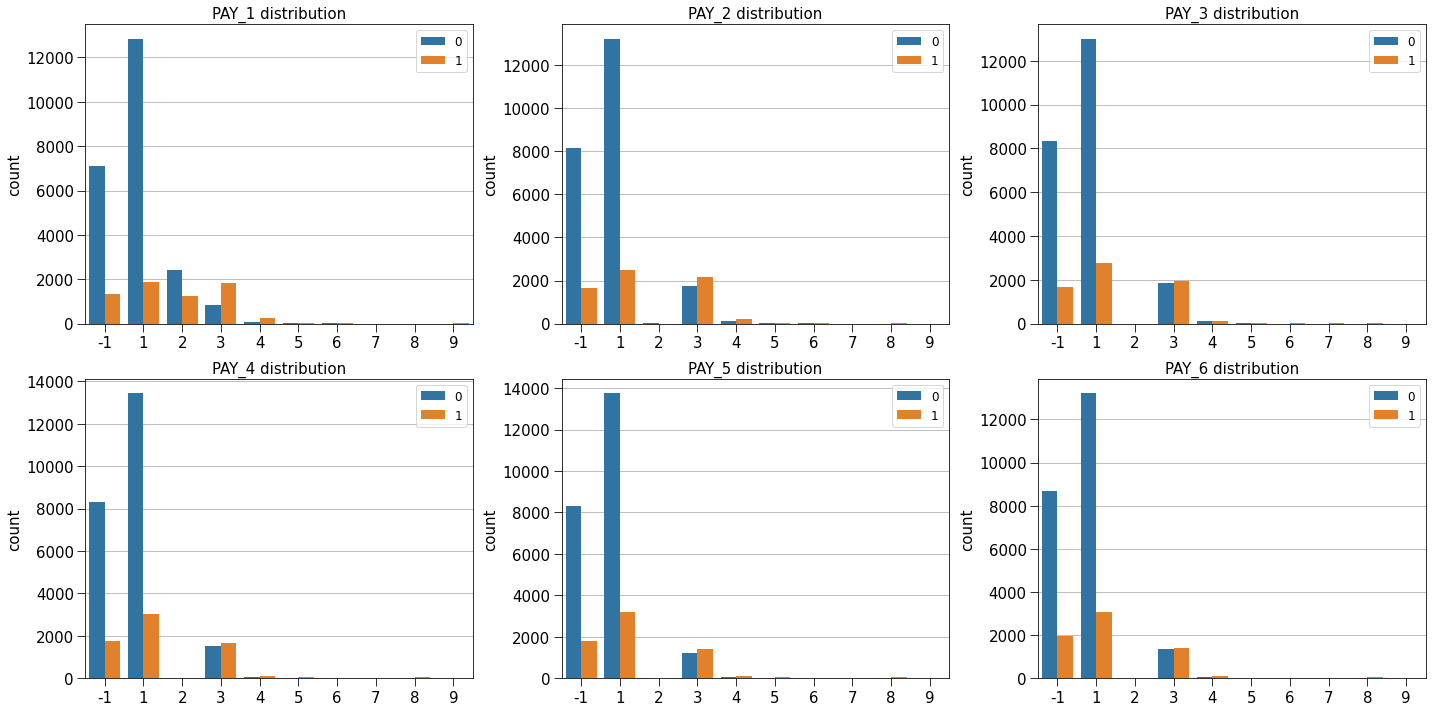

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

for i, col in enumerate(pay_cols):
    class_0 = df_cleaned.loc[df_cleaned['DEFAULT'] == 0][col]
    class_1 = df_cleaned.loc[df_cleaned['DEFAULT'] == 1][col]
    if i < 3:
        j = 0
    else:
        j = 1
        i = i - 3
    axs[j, i].grid(zorder=0, axis='y')
    axs[j, i].set_title(f'{col} distribution', fontsize=15)
    sns.countplot(x=col, data=df_cleaned, hue='DEFAULT', ax=axs[j, i], alpha=alpha, palette=palette, order=[-1]+list(range(1, 10)), zorder=2)
    axs[j, i].set_xticklabels(pay_cols_labels[col])
    axs[j, i].set_xlabel('')
    axs[j, i].set_ylabel('count', fontsize=15)
    axs[j, i].tick_params(axis='both', labelsize=15, size=8)
    axs[j, i].legend(loc='upper right', prop={'size': 12})

#plt.ylim((-10000, 25000))
fig.tight_layout()
plt.show()

##Correlation Analysis

###Correlation Numerical

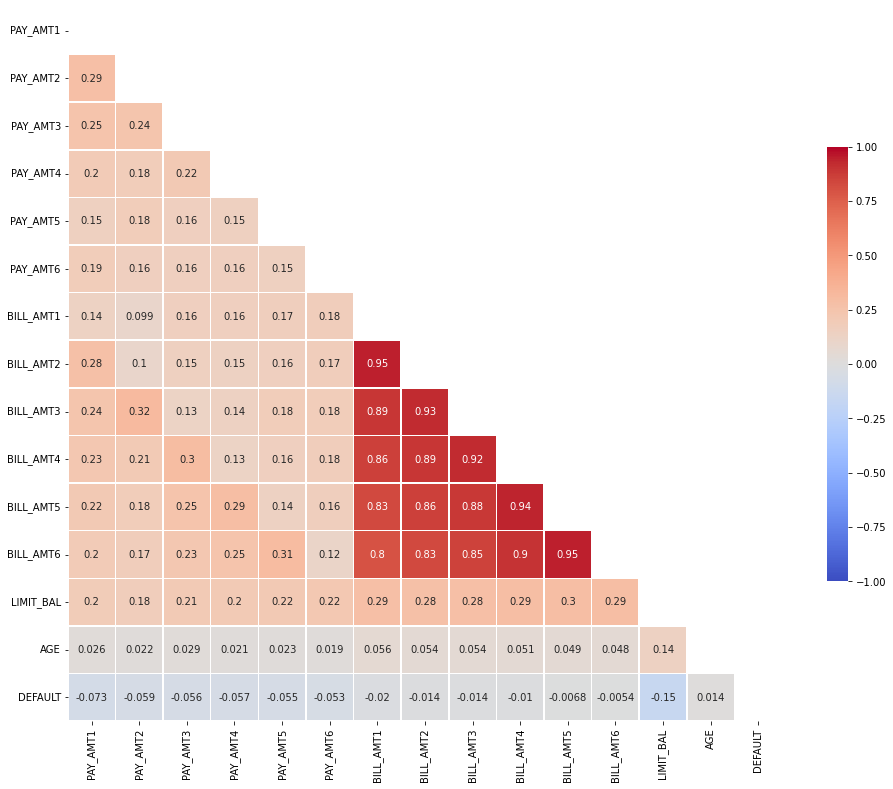

In [ ]:
corr = df_cleaned[num_cols+["DEFAULT"]].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(16, 16))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='coolwarm', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

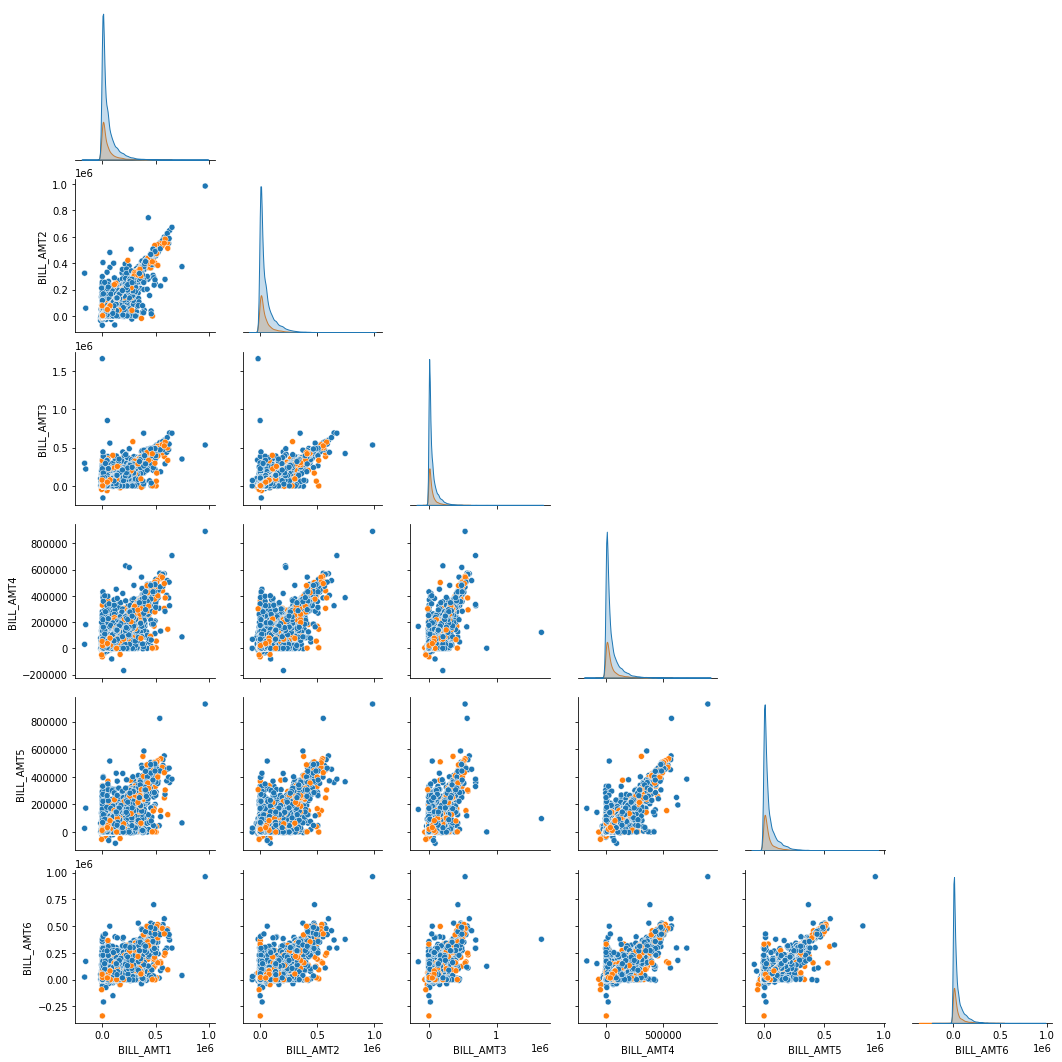

In [ ]:
pair_plot = sns.pairplot(df_cleaned[['DEFAULT']+bill_amt_cols], hue='DEFAULT', diag_kind='kde', corner=True, palette=palette)
pair_plot._legend.remove()

###Correlation Categorical

In [ ]:
#Correlation for categorical features

def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return np.sqrt(stat/(obs*mini))

In [ ]:
rows= []
df_cat_temp= df_cleaned[['EDUCATION', 'SEX', 'MARRIAGE']+pay_cols+["DEFAULT"]]
for var1 in df_cat_temp:
    col = []
    for var2 in df_cat_temp :
        #print(var1,var2)
        cramers = cramers_V(df_cat_temp[var1], df_cat_temp[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
cramers_results = np.array(rows)
df_corr_categorical = pd.DataFrame(cramers_results, columns = df_cat_temp.columns, index =df_cat_temp.columns)

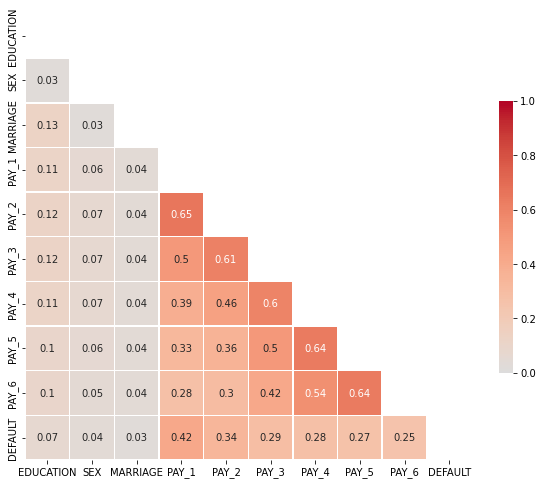

In [ ]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('coolwarm')
new_cmap = truncate_colormap(cmap, 0, 1)

mask = np.triu(np.ones_like(df_corr_categorical, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_corr_categorical, mask=mask, vmax=1, vmin=0., center=0, cmap=new_cmap, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

plt.show()

#Data Preprocessing

In [ ]:
y = df_cleaned["DEFAULT"]
X = df_cleaned.drop(["DEFAULT"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Handling Categorical Features

In [ ]:
df_encoded = pd.get_dummies(X_train, prefix=['EDUCATION', 'SEX', 'MARRIAGE']+pay_cols, prefix_sep="_", columns=['EDUCATION', 'SEX', 'MARRIAGE']+pay_cols)

In [ ]:
df_encoded.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'SEX_1', 'SEX_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3',
       'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_1_9',
       'PAY_2_-1', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_2_9', 'PAY_3_-1', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_3_9', 'PAY_4_-1', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_4_9',
       'PAY_5_-1', 'PAY_5_1', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6',
       'PAY_5_7', 'PAY_5_8', 'PAY_5_9', 'PAY_6_-1', 'PAY_6_1', 'PAY_6_3',
       'PAY_6_4', 'PAY_6_5', 'PAY_6_6', '

In [ ]:
df_encoded = df_encoded.drop(columns=['EDUCATION_4', 'SEX_2', 'MARRIAGE_3']+[f'{pay}_8' for pay in pay_cols])

In [ ]:
df_encoded.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'SEX_1', 'MARRIAGE_1', 'MARRIAGE_2', 'PAY_1_-1',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6',
       'PAY_1_7', 'PAY_1_9', 'PAY_2_-1', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3',
       'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_9', 'PAY_3_-1',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_9', 'PAY_4_-1', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_9', 'PAY_5_-1',
       'PAY_5_1', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7',
       'PAY_5_9', 'PAY_6_-1', 'PAY_6_1', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_9'],
      dtype='object')

In [ ]:
df_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_5_9,PAY_6_-1,PAY_6_1,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_9
ID,,,,,,,,,,,,,,,,,,,,,
21754,80000,24,75125,77353,78321,73731,39643,39457,3503,5001,...,0,0,0,1,0,0,0,0,0,0
252,30000,28,29242,29507,29155,25255,22001,0,5006,1244,...,0,0,0,1,0,0,0,0,0,0
22942,180000,44,20916,0,850,0,6881,10340,0,850,...,0,0,1,0,0,0,0,0,0,0
619,60000,25,58839,53235,38533,39639,39619,39140,2018,1900,...,0,0,0,1,0,0,0,0,0,0
17091,130000,25,111587,112348,114734,117823,120854,123904,4100,4200,...,0,0,0,1,0,0,0,0,0,0


##Handling Outliers

In [ ]:
lcf = LocalOutlierFactor()
is_outlier = lcf.fit_predict(df_encoded)

In [ ]:
df_encoded_lof = df_encoded[is_outlier == 1]

In [ ]:
df_encoded_lof.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_5_9,PAY_6_-1,PAY_6_1,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_9
ID,,,,,,,,,,,,,,,,,,,,,
21754,80000,24,75125,77353,78321,73731,39643,39457,3503,5001,...,0,0,0,1,0,0,0,0,0,0
252,30000,28,29242,29507,29155,25255,22001,0,5006,1244,...,0,0,0,1,0,0,0,0,0,0
619,60000,25,58839,53235,38533,39639,39619,39140,2018,1900,...,0,0,0,1,0,0,0,0,0,0
17091,130000,25,111587,112348,114734,117823,120854,123904,4100,4200,...,0,0,0,1,0,0,0,0,0,0
6363,20000,32,19844,19238,20205,19588,20037,19880,0,1302,...,0,0,0,1,0,0,0,0,0,0


##Handling Numerical features

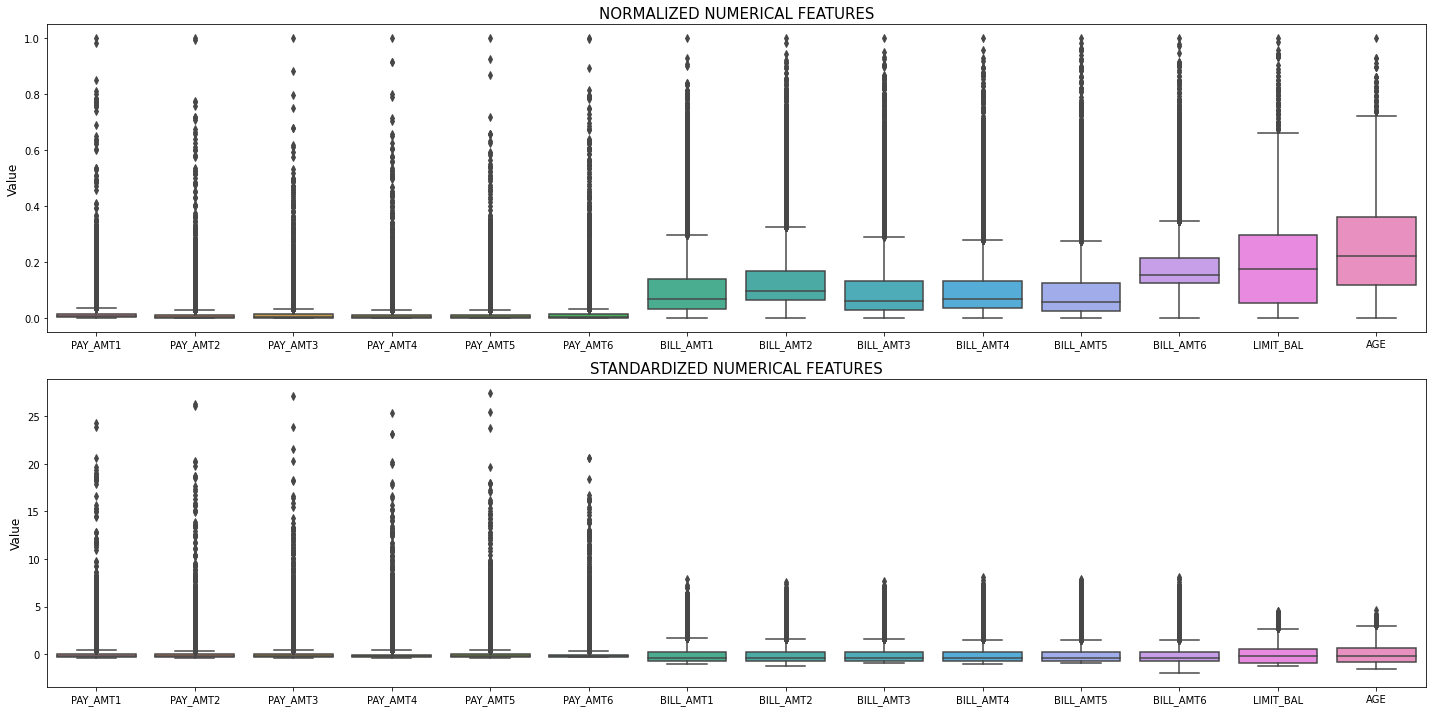

In [ ]:
df_cleaned_minmax = MinMaxScaler().fit_transform(df_encoded_lof[num_cols])
df_cleaned_stscal = StandardScaler().fit_transform(df_encoded_lof[num_cols])

fig, ax = plt.subplots(2, figsize=(20,10))
sns.boxplot(data=df_cleaned_minmax, ax=ax[0])
sns.boxplot(data=df_cleaned_stscal, ax=ax[1])

ax[0].set_title('NORMALIZED NUMERICAL FEATURES', fontsize=15)
ax[0].set_ylabel('Value', fontsize=12)
ax[0].set_xticklabels(num_cols, fontsize=10)

ax[1].set_title('STANDARDIZED NUMERICAL FEATURES', fontsize=15)
ax[1].set_ylabel('Value', fontsize=12)
ax[1].set_xticklabels(num_cols, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# We decide to apply Normalization

df_encoded_normalized = df_encoded_lof.copy()
for i, col in enumerate(num_cols):
    df_encoded_normalized[col] = df_cleaned_minmax[:, i]

In [ ]:
df_encoded_normalized.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_5_9,PAY_6_-1,PAY_6_1,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_9
ID,,,,,,,,,,,,,,,,,,,,,
21754,0.094595,0.051724,0.140871,0.178503,0.151832,0.156078,0.094283,0.188416,0.011492,0.012885,...,0,0,0,1,0,0,0,0,0,0
252,0.027027,0.120690,0.069397,0.101354,0.068211,0.072918,0.061315,0.122830,0.016423,0.003205,...,0,0,0,1,0,0,0,0,0,0
619,0.067568,0.068966,0.115502,0.139614,0.084161,0.097593,0.094238,0.187889,0.006620,0.004895,...,0,0,0,1,0,0,0,0,0,0
17091,0.162162,0.068966,0.197669,0.234930,0.213762,0.231718,0.246043,0.328785,0.013451,0.010821,...,0,0,0,1,0,0,0,0,0,0
6363,0.013514,0.189655,0.054758,0.084795,0.052989,0.063196,0.057644,0.155874,0.000000,0.003355,...,0,0,0,1,0,0,0,0,0,0


##Applying Principal Component Analysis

In [ ]:
df_for_PCA = df_encoded_normalized.copy()

pca = PCA()
filtered_df = pca.fit_transform(df_for_PCA)
filtered_df = pd.DataFrame(filtered_df)

In [ ]:
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues: this will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
var_dict = {f"c{i}": var for i, var in zip(range(1, len(df_for_PCA.columns) + 1), cum_sum_eigenvalues)}

print(var_dict)
 
for i, eig in enumerate(cum_sum_eigenvalues): 
    if eig >= 0.99: 
        print(f"We need {i+1} components to explain at least the 99% of the variance.") 
        break

{'c1': 0.3568749924240165, 'c2': 0.47279425218637966, 'c3': 0.5776836561266195, 'c4': 0.6519946637571287, 'c5': 0.708704910187408, 'c6': 0.7568626028250606, 'c7': 0.7972309291054831, 'c8': 0.8288381914667056, 'c9': 0.8554136878637344, 'c10': 0.8759892366714629, 'c11': 0.8956474688291005, 'c12': 0.9098566139469517, 'c13': 0.9234337807256139, 'c14': 0.9355478691492516, 'c15': 0.9465780402391468, 'c16': 0.9552243743819123, 'c17': 0.9625338131920195, 'c18': 0.9693100966766189, 'c19': 0.9738190484923668, 'c20': 0.9775900778103397, 'c21': 0.9806763031922274, 'c22': 0.98330352031386, 'c23': 0.9857299202565, 'c24': 0.9876053501067669, 'c25': 0.9890434875765619, 'c26': 0.9903546539751448, 'c27': 0.9915786194103532, 'c28': 0.9925779849039964, 'c29': 0.993566609839546, 'c30': 0.9942592262005396, 'c31': 0.994907591611863, 'c32': 0.9954071813577147, 'c33': 0.9958653067540796, 'c34': 0.9962947676999571, 'c35': 0.9966832336150871, 'c36': 0.9970410937998637, 'c37': 0.9973616417925899, 'c38': 0.9976551

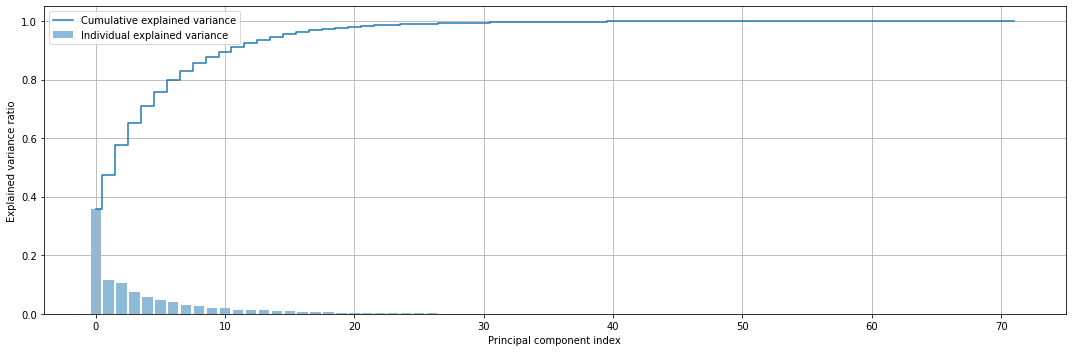

In [ ]:
# Create the visualization plot
plt.figure(figsize=(15, 5))
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
#plt.xlim(-1, 30)
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.show()

#Pipeline creation
- OneHot Encoding
- Outliers Detection
- Numerical Features Scaling (MinMaxScaler)
- Dimensionality Reduction (PCA, LDA)
- Resample (ClusterCentroid, SMOTE, SMOTENC, k-means SMOTE)
- Classifier Training (LogisticRegression, SVM, Decision Tree, Random Forest, KNN)

In [ ]:
scalers = {"None": None, 
           "MinMaxScaler": MinMaxScaler(), 
           "StandardScaler": StandardScaler()}
dims = {"None": None, 
        "PCA": PCA(n_components=26), 
        "LDA": LDA()}
resamplers = {"None": None, 
              "ClusterCentroids": ClusterCentroids(n_jobs=-1, random_state=42), 
              "SMOTE": SMOTE(random_state=42), 
              "KMeansSMOTE": KMeansSMOTE(random_state=42,cluster_balance_threshold=0.1), 
              "SMOTENC": SMOTENC(list(range(14,23)), random_state=42)}
models = {"LogisticRegression": LogisticRegression(random_state=42,max_iter=50),
          "RandomForestClassifier": RandomForestClassifier(random_state=42),
          "SVC": SVC(random_state=42),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42)}

def CustomSampler(X, y):
    indeces=[]
    lcf = LocalOutlierFactor()
    is_outlier = lcf.fit_predict(X)
    for el in is_outlier:
        if el == 1:
            indeces.append(True)
        else:
            indeces.append(False)
    mask = indeces
    return X[mask], y[mask]

class Dummies(TransformerMixin):
    def __init__(self, **kwargs):
        self.kwargs = kwargs
        self.to_drop = [2, 4, 3]+[9 for i in range(6)]
        self.pay_i=[-1,1,2,3,4,5,6,7,8,9]
        self.categories = [[1, 2], [1, 2, 3, 4], [1, 2, 3]]+[self.pay_i for i in range(6)]

    def transform(self, X, **transformparams):
        pay_i = [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]
        X_encoded = OneHotEncoder(sparse=False, drop=self.to_drop, categories=self.categories).fit_transform(X[:, 14:])
        return np.concatenate((X[:, 0:14], X_encoded), axis=1)

    def fit(self, X, y=None, **fitparams):
        return self

class MinMaxScalerCustom(TransformerMixin):
    def __init__(self, **kwargs):
        # self.threshold = kwargs.pop('neg_conf_val', -10.0)
        self.kwargs = kwargs

    def transform(self, X, **transformparams):
        X_scaled = X.copy()
        X_scaled[0:14] = MinMaxScaler().fit_transform(X_scaled[0:14])
        return X_scaled

    def fit(self, X, y=None, **fitparams):
        return self

def create_pipeline(model, is_outlier=False, scaler=None, dim_reduction=None, resampling=None, smotenc=False):    
    steps = []
    if not smotenc:
        steps.append(("cat_pipe", Dummies()))
    if is_outlier:
        steps.append(("is_outlier", FunctionSampler(func=CustomSampler, validate = False)))
    if scaler is not None:
        steps.append(('num_pipe', MinMaxScalerCustom()))
    if dim_reduction is not None:
        steps.append(("dim_reduction", dim_reduction))
    if resampling is not None:
        steps.append(("resampling", resampling))
    
    steps.append(("model", model))
    pipe = Pipeline(steps=steps)
    return pipe

In [ ]:
models_combinations = defaultdict(lambda: dict())

for is_outlier in [True, False]:
    if is_outlier:
        out = "LOF"
    else:
        out = ""
    for scaler in ["MinMaxScaler"]:
        if scaler == "None":
            sc = ""
        else:
            sc = scaler
        for dim_reduction in ["None", "LDA", "PCA"]:
            if dim_reduction == "None":
                dim = ""
            else:
                dim = dim_reduction
            for resampling in ["KMeansSMOTE", "SMOTE", "SMOTENC", "None", "ClusterCentroids"]:
                if resampling == "None":
                    res = ""
                else:
                    res = resampling
                if resampling == "SMOTENC":
                    smotenc = True
                else:
                    smotenc = False
                if (dim_reduction == "None" and resampling in ["SMOTENC", "None"]) or (dim_reduction != "None" and resampling != "SMOTENC"):
                    for model in models.keys():
                        pipe = create_pipeline(models[model], is_outlier, scalers[scaler], dims[dim_reduction], resamplers[resampling], smotenc)
                        final = ""
                        for name in [out, dim, res]:
                            if name != "":
                                if final == "":
                                    final += name
                                else:
                                    final += f" + {name}"
                        models_combinations[model][final] = pipe

In [ ]:
def reorder_df_cols(X):
    return X[num_cols + cat_cols].to_numpy()

def plot_test_scores(model):
    X_test_s = reorder_df_cols(X_test)
    y_test_s = y_test.to_numpy()
    y_pred = model.predict(X_test_s)
    test_acc = accuracy_score(y_test_s, y_pred)
    test_precision = precision_score(y_test_s, y_pred)
    test_recall = recall_score(y_test_s, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test_s, y_pred)
    test_auc = auc(recall, precision)
    test_f1 = f1_score(y_test_s, y_pred)
    
    print("Test Scores:")
    print(f"- Accuracy:\t{test_acc}")
    print(f"- Recall:\t{test_recall}")
    print(f"- Precision:\t{test_precision}")
    print(f"- F1-score:\t{test_f1}")
    print(f"- AUC:\t\t{test_auc}")
    
    fig, axs = plt.subplots(1, 2, figsize=(10,4))
    plot_confusion_matrix(model, X_test_s, y_test_s, cmap=plt.cm.Blues, normalize='true', ax=axs[0])
    no_skill = len(y_test_s[y_test_s==1]) / len(y_test_s)
    plot_precision_recall_curve(model, X_test_s, y_test_s, ax=axs[1])
    plt.axhline(no_skill, 0, ls='--', label='No Skill')
    plt.ylim([-0.05, 1.05])
    axs[1].legend(loc = 'upper right')
    plt.show()
    
    return test_acc, test_recall, test_precision, test_f1, test_auc

MODEL: LogisticRegression, with settings: LOF + SMOTENC
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Best parameters:	{'model__C': 0.6}
Best validation score:	0.31240466650976434
Test Scores:
- Accuracy:	0.7113333333333334
- Recall:	0.31987814166031986
- Precision:	0.33359809372517873
- F1-score:	0.3265940902021773
- AUC:		0.401154784359416


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


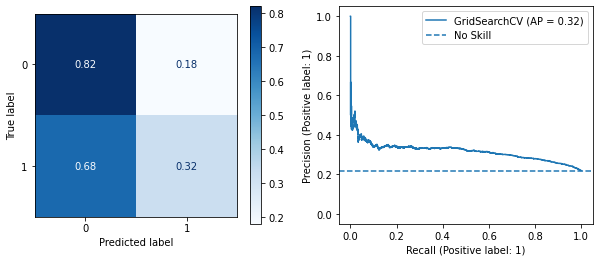

MODEL: LogisticRegression, with settings: LOF
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Best parameters:	{'model__C': 0.6}
Best validation score:	0.0011162868118463729
Test Scores:
- Accuracy:	0.7813333333333333
- Recall:	0.0015232292460015233
- Precision:	0.6666666666666666
- F1-score:	0.0030395136778115497
- AUC:		0.44334494795633406


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


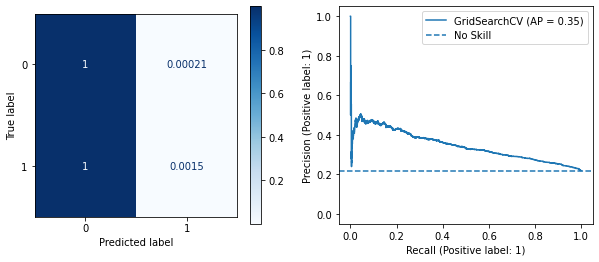

MODEL: LogisticRegression, with settings: LOF + LDA + KMeansSMOTE
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:	{'model__C': 0.6}
Best validation score:	0.5263107228880363
Test Scores:
- Accuracy:	0.7998333333333333
- Recall:	0.5034272658035034
- Precision:	0.5462809917355372
- F1-score:	0.5239793896155371
- AUC:		0.5791874621028537


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


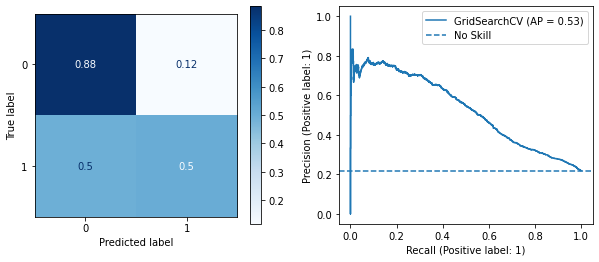

MODEL: LogisticRegression, with settings: LOF + LDA + SMOTE
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:	{'model__C': 0.6}
Best validation score:	0.5251261279516231
Test Scores:
- Accuracy:	0.7841666666666667
- Recall:	0.5483625285605483
- Precision:	0.5063291139240507
- F1-score:	0.5265082266910421
- AUC:		0.5767624879089661


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


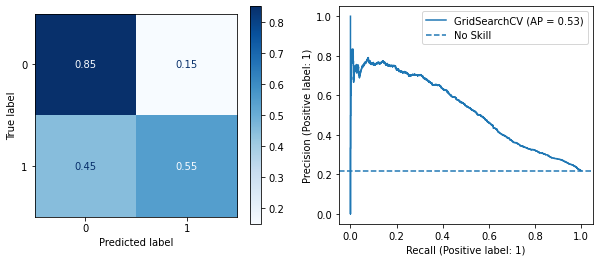

MODEL: LogisticRegression, with settings: LOF + LDA
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:	{'model__C': 0.6}
Best validation score:	0.47279125488962503
Test Scores:
- Accuracy:	0.819
- Recall:	0.345011424219345
- Precision:	0.6671575846833578
- F1-score:	0.45481927710843373
- AUC:		0.5777511711180181


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


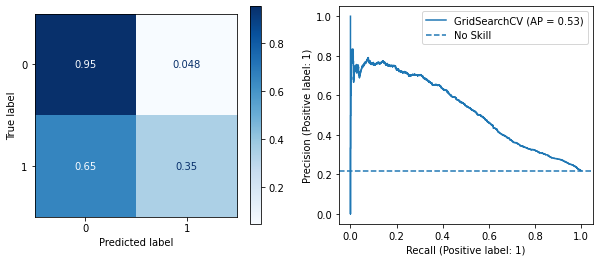

MODEL: LogisticRegression, with settings: LOF + LDA + ClusterCentroids
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:122: FutureWarning: 'n_jobs' was deprecated in 0.7 and will be removed in 0.9
  FutureWarning,


Best parameters:	{'model__C': 0.6}
Best validation score:	0.5218946074435625
Test Scores:
- Accuracy:	0.807
- Recall:	0.4744859101294745
- Precision:	0.5710357470210816
- F1-score:	0.5183028286189685
- AUC:		0.580260828575278


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


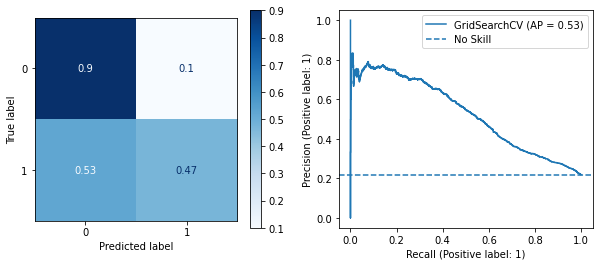

MODEL: LogisticRegression, with settings: LOF + PCA + KMeansSMOTE
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Best parameters:	{'model__C': 0.6}
Best validation score:	0.3998538990846813
Test Scores:
- Accuracy:	0.5266666666666666
- Recall:	0.7296268088347296
- Precision:	0.27824571594539643
- F1-score:	0.40285954583683764
- AUC:		0.5335195957233964


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


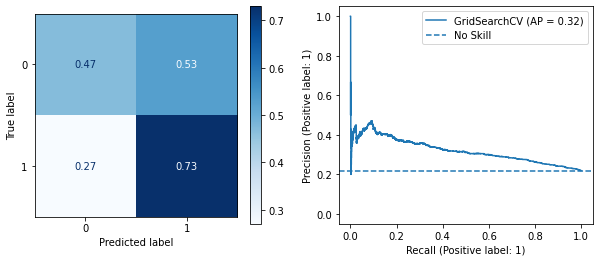

MODEL: LogisticRegression, with settings: LOF + PCA + SMOTE
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Best parameters:	{'model__C': 0.6}
Best validation score:	0.4097874019342463
Test Scores:
- Accuracy:	0.5066666666666667
- Recall:	0.7867479055597868
- Precision:	0.27821168866145973
- F1-score:	0.41106247512932753
- AUC:		0.5558131304439565


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


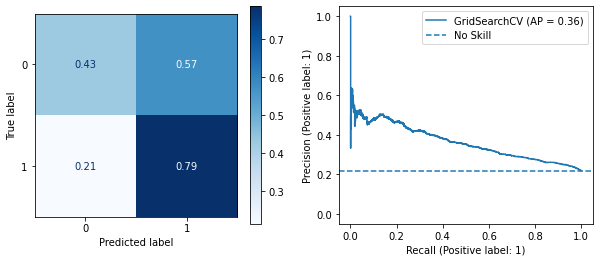

MODEL: LogisticRegression, with settings: LOF + PCA
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Best parameters:	{'model__C': 0.6}
Best validation score:	0.40666630263152886
Test Scores:
- Accuracy:	0.5261666666666667
- Recall:	0.7486671744097486
- Precision:	0.2811784897025172
- F1-score:	0.4088168018299023
- AUC:		0.542422832056133


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


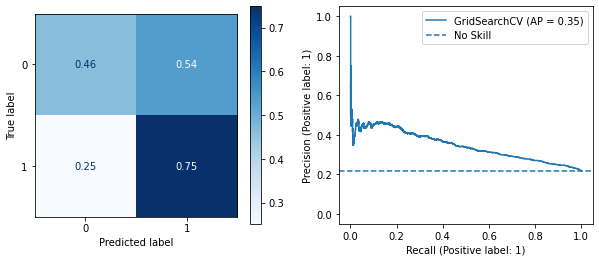

MODEL: LogisticRegression, with settings: LOF + PCA + ClusterCentroids
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:122: FutureWarning: 'n_jobs' was deprecated in 0.7 and will be removed in 0.9
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.fro

Best parameters:	{'model__C': 0.6}
Best validation score:	0.40852806218586757
Test Scores:
- Accuracy:	0.49416666666666664
- Recall:	0.8042650418888042
- Precision:	0.27543035993740217
- F1-score:	0.4103361181270643
- AUC:		0.5612643675797698


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


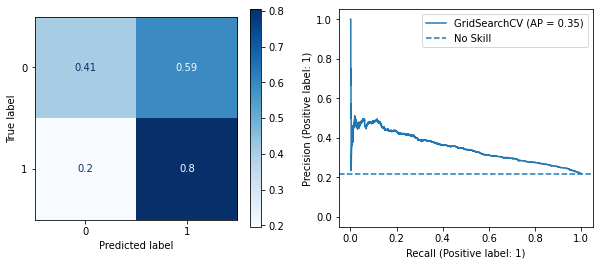

MODEL: LogisticRegression, with settings: SMOTENC
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_

Best parameters:	{'model__C': 0.6}
Best validation score:	0.33556292057322007
Test Scores:
- Accuracy:	0.6888333333333333
- Recall:	0.3617669459253618
- Precision:	0.3158244680851064
- F1-score:	0.33723819666311683
- AUC:		0.4086290403385674


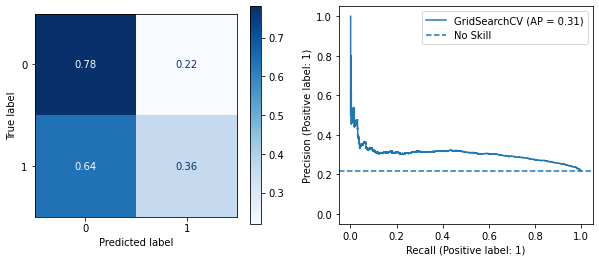

MODEL: LogisticRegression, with settings: 
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 

Best parameters:	{'model__C': 0.6}
Best validation score:	0.0
Test Scores:
- Accuracy:	0.7811666666666667
- Recall:	0.0
- Precision:	0.0
- F1-score:	0.0
- AUC:		0.6094166666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


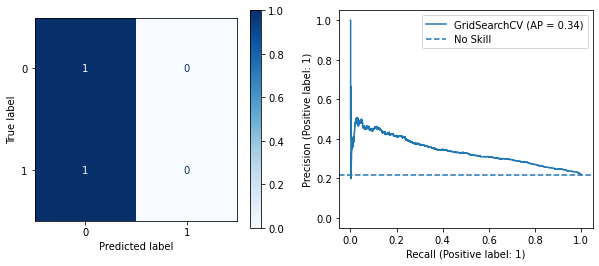

MODEL: LogisticRegression, with settings: LDA + KMeansSMOTE
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:	{'model__C': 0.6}
Best validation score:	0.5302585735608818
Test Scores:
- Accuracy:	0.8036666666666666
- Recall:	0.48743335872048743
- Precision:	0.5589519650655022
- F1-score:	0.5207485760781123
- AUC:		0.5792759952263281


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


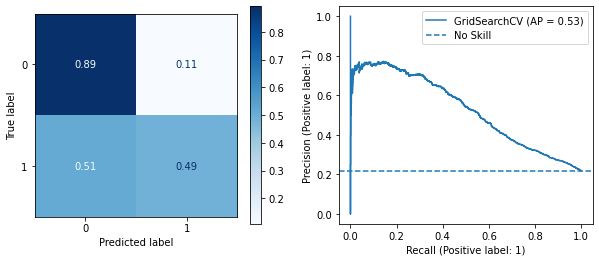

MODEL: LogisticRegression, with settings: LDA + SMOTE
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:	{'model__C': 0.6}
Best validation score:	0.5293134439722529
Test Scores:
- Accuracy:	0.788
- Recall:	0.5468392993145469
- Precision:	0.5146953405017921
- F1-score:	0.5302806499261448
- AUC:		0.5803506532415028


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


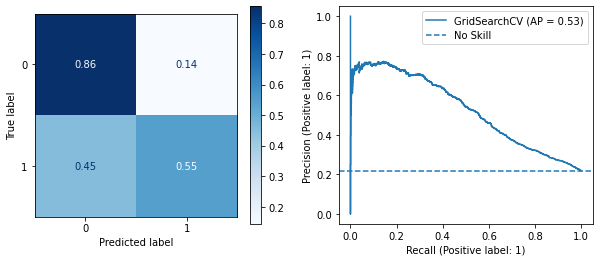

MODEL: LogisticRegression, with settings: LDA
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:	{'model__C': 0.6}
Best validation score:	0.4714635409966725
Test Scores:
- Accuracy:	0.8195
- Recall:	0.3480578827113481
- Precision:	0.6681286549707602
- F1-score:	0.457686529794692
- AUC:		0.5794266021743875


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


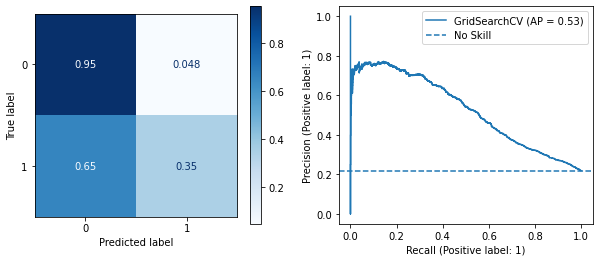

MODEL: LogisticRegression, with settings: LDA + ClusterCentroids
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:122: FutureWarning: 'n_jobs' was deprecated in 0.7 and will be removed in 0.9
  FutureWarning,


Best parameters:	{'model__C': 0.6}
Best validation score:	0.5250927562269665
Test Scores:
- Accuracy:	0.8083333333333333
- Recall:	0.4752475247524752
- Precision:	0.5751152073732719
- F1-score:	0.5204336947456214
- AUC:		0.5825980327295402


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


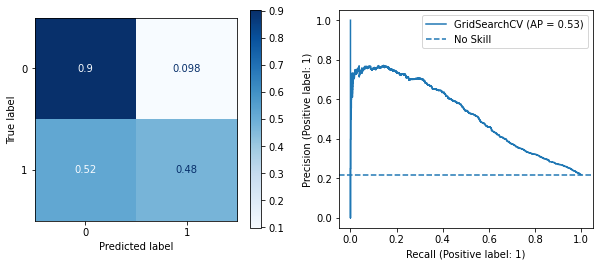

MODEL: LogisticRegression, with settings: PCA + KMeansSMOTE
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:	{'model__C': 0.6}
Best validation score:	0.39814644901563306
Test Scores:
- Accuracy:	0.5226666666666666
- Recall:	0.7281035795887281
- Precision:	0.27606121859659255
- F1-score:	0.4003350083752094
- AUC:		0.5318323990926603


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


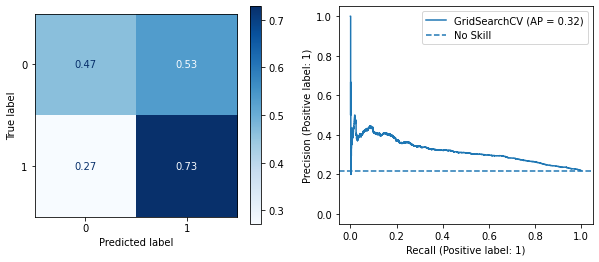

MODEL: LogisticRegression, with settings: PCA + SMOTE
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:	{'model__C': 0.6}
Best validation score:	0.4073199191139727
Test Scores:
- Accuracy:	0.488
- Recall:	0.8095963442498096
- Precision:	0.2736164736164736
- F1-score:	0.4090034628703348
- AUC:		0.562439742266475


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


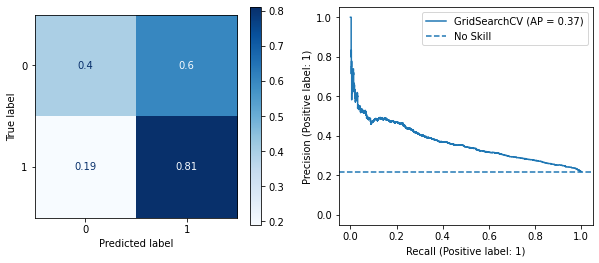

MODEL: LogisticRegression, with settings: PCA
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:	{'model__C': 0.6}
Best validation score:	0.4020214177249167
Test Scores:
- Accuracy:	0.5133333333333333
- Recall:	0.7479055597867479
- Precision:	0.27499299915989917
- F1-score:	0.4021294021294021
- AUC:		0.5390326128066569


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


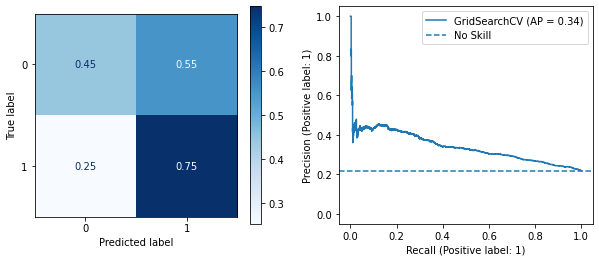

MODEL: LogisticRegression, with settings: PCA + ClusterCentroids
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:122: FutureWarning: 'n_jobs' was deprecated in 0.7 and will be removed in 0.9
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.fro

Best parameters:	{'model__C': 0.6}
Best validation score:	0.4034098678543307
Test Scores:
- Accuracy:	0.4716666666666667
- Recall:	0.8286367098248286
- Precision:	0.2697743615174808
- F1-score:	0.40703329592218485
- AUC:		0.5679555356711548


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


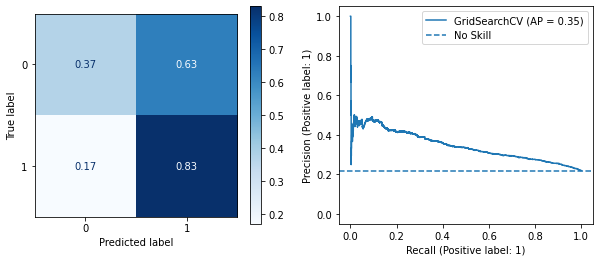

MODEL: RandomForestClassifier, with settings: LOF + SMOTENC
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'model__max_features': 'sqrt', 'model__n_estimators': 200}
Best validation score:	0.5072350151333578
Test Scores:
- Accuracy:	0.7875
- Recall:	0.4683929931454684
- Precision:	0.5159395973154363
- F1-score:	0.4910179640718563
- AUC:		0.5503329618971189


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


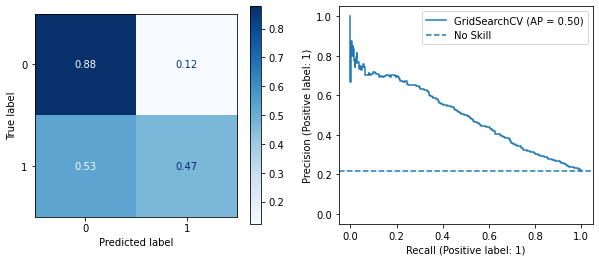

MODEL: RandomForestClassifier, with settings: LOF
Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: ignored

In [ ]:
params = {"LogisticRegression": {'model__C': [0.6]},#, 1e-2, 1e-1, 1e0, 1e1, 1e2]},
          "RandomForestClassifier": {'model__n_estimators': [10, 50, 100, 200], 'model__max_features': [None, 'sqrt']},
          "SVC": {'model__C': [1e-1, 1e0, 1e1, 1e2], 'model__kernel': ['rbf', 'poly'], 'model__gamma': [1e-1, 'scale']},
          "KNeighborsClassifier": {'model__k': [5, 10, 20]},
          "DecisionTreeClassifier": {'model__max_depth': [5, 10, 20, 30, 50]}}

for model, pipelines in models_combinations.items():
    for name, pipeline in pipelines.items():
        print(f"MODEL: {model}, with settings: {name}")
        gs = GridSearchCV(estimator = pipeline,
                      param_grid = params[model],
                      scoring = 'f1',
                      cv = 5, 
                      n_jobs = -1,
                      verbose = 2.1,
                      error_score="raise")
        X_grid= reorder_df_cols(X_train)
        y_grid= y_train.to_numpy()
        gs.fit(X_grid, y_grid)
        print(f"Best parameters:\t{gs.best_params_}")
        print(f"Best validation score:\t{gs.best_score_}")
        
        test_scores = plot_test_scores(gs)